In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
print(data.head())
print(data.info())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [4]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    m = len(y)
    return - (1/m) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))

def gradient_descent(X, y, weights, bias, lr):
    m = X.shape[0]
    y_hat = sigmoid(np.dot(X, weights) + bias)
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)
    weights -= lr * dw
    bias -= lr * db
    return weights, bias


In [6]:
def train(X, y, lr=0.01, epochs=1000):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for i in range(epochs):
        y_hat = sigmoid(np.dot(X, weights) + bias)
        loss = compute_loss(y, y_hat)
        losses.append(loss)
        weights, bias = gradient_descent(X, y, weights, bias, lr)

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return weights, bias, losses

weights, bias, losses = train(X_train, y_train, lr=0.1, epochs=1000)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4048
Epoch 200, Loss: 0.3824
Epoch 300, Loss: 0.3765
Epoch 400, Loss: 0.3744
Epoch 500, Loss: 0.3735
Epoch 600, Loss: 0.3732
Epoch 700, Loss: 0.3730
Epoch 800, Loss: 0.3729
Epoch 900, Loss: 0.3729


In [7]:
def predict(X, weights, bias, threshold=0.5):
    y_prob = sigmoid(np.dot(X, weights) + bias)
    return (y_prob >= threshold).astype(int)

y_pred = predict(X_test, weights, bias)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8875
Precision: 0.9130434782608695
Recall: 0.75
F1 Score: 0.8235294117647058
Confusion Matrix:
 [[50  2]
 [ 7 21]]


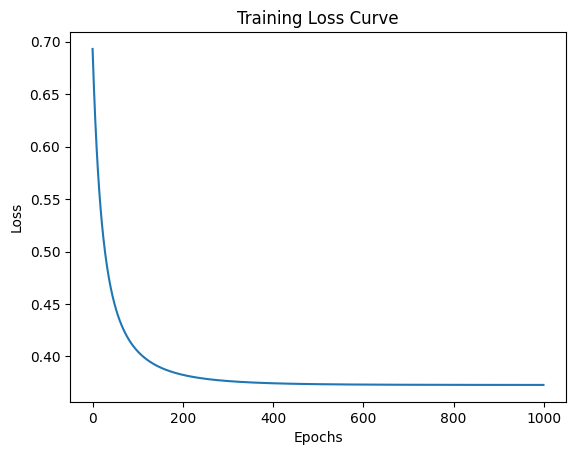

In [8]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
